In [1]:
# problem imports
from ne.benchmark.mop1 import MOP1
from ne.benchmark.saddle import Saddle

# alg imports
from ne.nash_eq_algs.bayes_ne import BayesNE
from ne.nash_eq_algs.gpgame import GPGame
from ne.nash_eq_algs.stoch_search_methods import iterated_best_response, hier_sa

# util imports
from ne.utils.plots import plot_decision_space, plot_regret_trace

# filter numerical convergence warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
np.random.seed(1)

#### Problem 1: SADDLE

In [2]:
dim = 2
x_opt = 0.5
is_noise = False
problem = Saddle(is_minimize=False, is_noise=is_noise, dim=dim, x_opt=x_opt)

###### BN-Exact

In [3]:
bn_exact = BayesNE(problem.evaluate, [dim // 2, dim // 2], is_approx=False, epsilon=0.15)

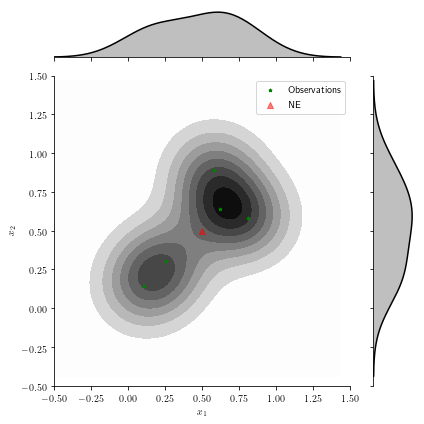

In [4]:
# show the initial design
plot_decision_space(bn_exact.pts, actual_ne=problem.get_x_ne(), title=None)

In [5]:
# Search
bn_exact.run()

WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.93e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.93e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.93e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=2):  flat fitness (f=-0.077364, sigma=2.05e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=2):  

In [6]:
# regression erros on the sampled points
bn_exact.errs

[array([0.03757658]),
 array([0.15802438]),
 array([0.08785883]),
 array([0.15386854]),
 array([0.11655404]),
 array([0.00121341]),
 array([0.0003209]),
 array([0.05406471]),
 array([2.80725242e-05]),
 array([1.67708683e-05]),
 array([1.58726882e-05]),
 array([8.4250952e-06]),
 array([0.00919783]),
 array([5.15200583e-06]),
 array([4.02530105e-06])]

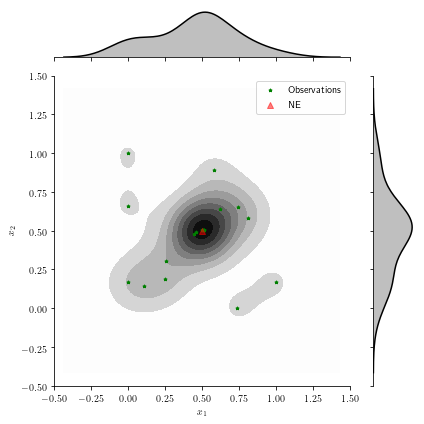

In [7]:
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

{'dim': 2, 'actual_fevals': 20, 'run': 1, 'alg': 'BN-exact', 'regret_trace': [0.02000742747086759, 0.02000742747086759, 0.02000742747086759, 0.02000742747086759, 0.02000742747086759, 0.02000742747086759, 0.02000742747086759, 0.02000742747086759, 0.02000742747086759, 0.02000742747086759, 0.0028648330275613406, 0.0016701563849278976, 0.0016701563849278976, 0.00011618318378252217, 6.111855022505129e-05, 6.111855022505129e-05, 6.111855022505129e-05, 6.111855022505129e-05, -1.8782848055149868e-06, -7.2094100477165285e-06], 'fevals': 20}


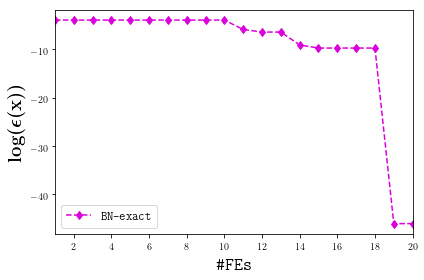

In [8]:
# compute regret trace
# We might get a negative numerical number as it is computed numerically.
run = 1
alg_variant = 'BN-exact'
actual_fevals = problem.get_num_evals()
fevals = actual_fevals
best_regret = np.inf
regret_trace = []
for xs in bn_exact.pts[:fevals]:
    best_regret = min(best_regret, problem.ne_regret(xs))
    regret_trace.append(best_regret)


stats = {
    'fevals': fevals,
    'run': run,
    'alg': alg_variant,
    'dim': dim,
    'actual_fevals': actual_fevals,
    'regret_trace': regret_trace
}
print(stats)
plot_regret_trace([stats], is_file=False)

In [9]:
# get a suggested NE (experimental): 
best_ne_br = bn_exact.suggest_approx_ne(best_crit='br')
best_ne_abr =  bn_exact.suggest_approx_ne(best_crit='abr')
best_ne_std = bn_exact.suggest_approx_ne(best_crit='std')

In [10]:
pts = [best_ne_br, best_ne_abr, best_ne_std]
names = ['br', 'abr', 'std']
print("NE: {}, Approx Regret: {}".format(
    problem.get_x_ne(), 
    bn_exact.approx_max_regret(problem.get_x_ne())
    ))
print("After {} function evaluations".format(problem.get_num_evals()))

for pt, name in zip(pts, names):
    print("=" * 20)
    print("{}-best pt: {}, Actual regret: {}".format(name, pt, problem.ne_regret(pt)))
    print("{}-best pt: {}, Approx regret: {}".format(name, pt, bn_exact.approx_max_regret(pt)))
    print("player 1 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_exact.approx_regret(pt, 0),
        bn_exact.approx_regret(problem.get_x_ne(), 0)
    ))
    print("player 2 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_exact.approx_regret(pt, 1),
        bn_exact.approx_regret(problem.get_x_ne(), 1)
    ))
# This clears sampled (queried) points which comes handy when we would like
# to sample points sampled by the algorithm or by the `problem.ne_regret` method
_ = problem.get_xs()

NE: [0.5 0.5], Approx Regret: 1.38334232403
After 2280 function evaluations
br-best pt: [0.4993884  0.50252819], Actual regret: 5.17305095685e-06
br-best pt: [0.4993884  0.50252819], Approx regret: 1.38291309582
player 1 - br-best pt regret: 1.38273593911, NE regret : 1.38318626589
player 2 - br-best pt regret: 1.38291309582, NE regret : 1.38334232403
abr-best pt: [0.45865202 0.48849072], Actual regret: 0.00170747118902
abr-best pt: [0.45865202 0.48849072], Approx regret: -23.7186904503
player 1 - abr-best pt regret: -23.7186904503, NE regret : 1.38318626589
player 2 - abr-best pt regret: -24.3500111432, NE regret : 1.38334232403
std-best pt: [0.49920721 0.50244159], Actual regret: 6.21724910042e-07
std-best pt: [0.49920721 0.50244159], Approx regret: 1.38299317808
player 1 - std-best pt regret: 1.38284501014, NE regret : 1.38318626589
player 2 - std-best pt regret: 1.38299317808, NE regret : 1.38334232403


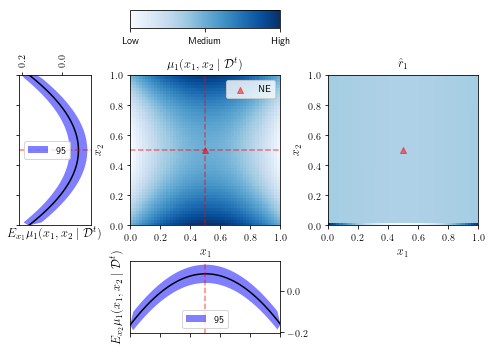

In [11]:
# view the current belief for player 1
bn_exact.plot_player_posterior(p=0, actual_ne=problem.get_x_ne(), title=None)

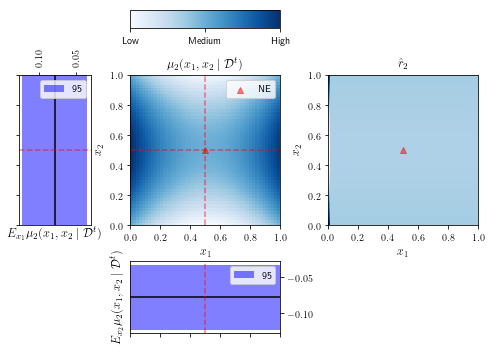

In [12]:
# view the current belief for player 2
bn_exact.plot_player_posterior(p=1, actual_ne=problem.get_x_ne(), title=None)

##### BN-Approx

WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=3.25e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=3.25e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=3.25e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=2):  flat fitness (f=-0.077364, sigma=2.25e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=2):  

iter 9 - x: [0.5254048  0.45088544], f(x): [0.0017668360297728091, -0.0017668360297728091]
log-marginal likelihood for 0's payoff: 36.6126160019
log-marginal likelihood for 1's payoff: 36.6126160019
iter 10 - x: [0.52687718 0.49674824], f(x): [-0.000711808620489616, 0.000711808620489616]
log-marginal likelihood for 0's payoff: 40.4281368458
log-marginal likelihood for 1's payoff: 40.4281368458
iter 11 - x: [0.47881459 0.4891015 ], f(x): [-0.00033004434351631835, 0.00033004434351631835]
log-marginal likelihood for 0's payoff: 46.1192423543
log-marginal likelihood for 1's payoff: 46.1192423543
iter 12 - x: [0.51742876 0.50395319], f(x): [-0.0002881339855233647, 0.0002881339855233647]
log-marginal likelihood for 0's payoff: 49.971909838
log-marginal likelihood for 1's payoff: 49.9719098379
iter 13 - x: [0.45931643 0.51676645], f(x): [-0.0013740393506994138, 0.0013740393506994138]
log-marginal likelihood for 0's payoff: 55.646597283
log-marginal likelihood for 1's payoff: 55.646597283
iter

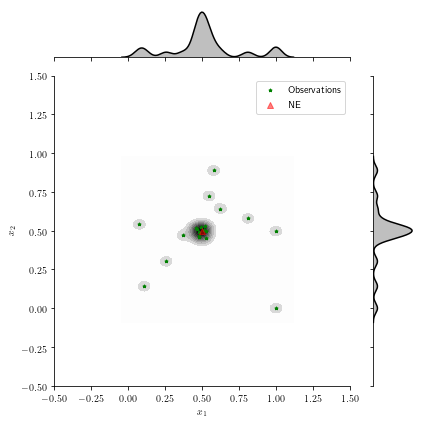

In [13]:
bn_approx = BayesNE(problem.evaluate, [dim // 2, dim // 2], is_approx=True)
# Search
bn_approx.run()
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

In [14]:
# The following algorithms assume minimizing the objective functions
problem = Saddle(is_minimize=True, is_noise=is_noise, dim=dim, x_opt=x_opt)

##### GPGame

In [15]:
gpg = GPGame(fct=problem.evaluate, var_assignment=[1,2], nobj=2)
_, pt, _ = gpg.run()
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

GPGame {'_crit': 'psim', '_max_iters': 20, '_n_init': 20, '_grid': 31, '_seed': 1, '_var_assignment': [1, 2], '_nobj': 2, 'r_fcn_str': '\n                function()\n                {\n                    require(GPGame)\n                    # Grid definition: player 1 plays x1...xj, player 2 xj+1...xn\n                    # The grid is a lattice made of two designs of different sizes\n                    n.s <- c(31, 31)\n                    x.to.obj <- c(1, 2)\n                    integcontrol <- list(n.s=n.s, gridtype=\'lhs\')\n                    # Set filtercontrol: window filter applied for integration and candidate points\n                    filtercontrol <- list(nsimPoints=800, ncandPoints=200,\n                    filter=c("window", "window"))\n                    # Set km control: lower bound is specified for the covariance range\n                    # Covariance type and model trend are specified\n                    kmcontrol <- list(lb=rep(.2,4), model.trend=~1, covtype="

RRuntimeError: Error in solve_game(fct, equilibrium = "NE", crit = "psim", n.init = 20,  : 
  could not find function "solve_game"


In [24]:
print("GPG-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))
# clear sampled points
_ = problem.get_xs()

GPG-best pt: [0.5017106571580253, 0.5017106571580253], Actual regret: -0.000114209982955


##### StochSearch

x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105


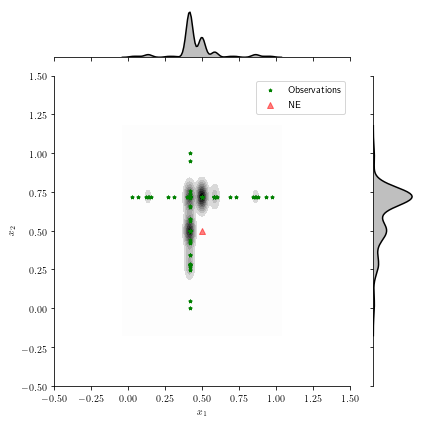

Iterated BR-best pt: [0.5 0.5], Actual regret: -7.81009392692e-06


In [16]:
# Iterated Best respone
pt = iterated_best_response(problem.evaluate, n_xs=[1, 1], max_fevals=500)
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)
print("Iterated BR-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))

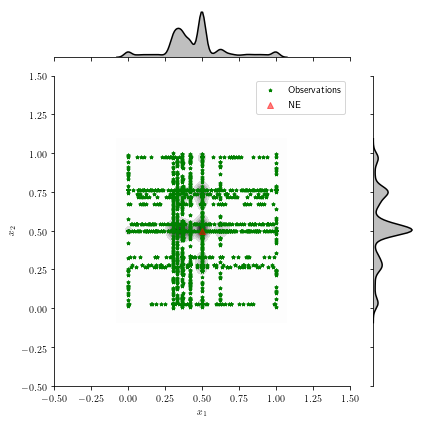

Hier SA-best pt: [0.5        0.54412086], Actual regret: 0.00194591542935


In [17]:
# Hierarchical SA
pt = hier_sa(problem.evaluate, n_xs=[1, 1], max_fevals=100)
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)
print("Hier SA-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))

#### Problem 2: MOP

In [18]:
problem = MOP1(is_minimize=False, is_noise=False)
# note: since the  MOP's domain is not [0,1]^D, and the fact that BayesNE operates in [0,1]^D.
# we set the flag is_unit in the `problem.ne_regret` when computing the regret of a point in [0,1]^D

In [19]:
bn_approx = BayesNE(problem.evaluate, [1, 1], is_approx=True, max_fevals=40, epsilon=0.05)

iter 0 - x: [5.64742139e-04 9.97405951e-01], f(x): [-17.493822085073027, 12.55640940294954]
log-marginal likelihood for 0's payoff: -53.4724758792
log-marginal likelihood for 1's payoff: -29.9355422228
iter 1 - x: [0.00956159 0.99977725], f(x): [-14.547435229399845, 13.933410457108327]
log-marginal likelihood for 0's payoff: -58.6181795133
log-marginal likelihood for 1's payoff: -31.5557182828
iter 2 - x: [0.05309625 0.99383098], f(x): [-5.326527042813907, 18.7780787381974]
log-marginal likelihood for 0's payoff: -60.6904607399
log-marginal likelihood for 1's payoff: -32.2638747953
iter 3 - x: [0.93832537 0.99868178], f(x): [-164.42458925683883, 18.0558581820862]
log-marginal likelihood for 0's payoff: -72.6426517576
log-marginal likelihood for 1's payoff: -35.7175302065
iter 4 - x: [1.58219701e-06 9.84590744e-01], f(x): [-18.57234280488459, 12.325283097494847]
log-marginal likelihood for 0's payoff: -75.7615944583
log-marginal likelihood for 1's payoff: -35.616184151
iter 5 - x: [0.00

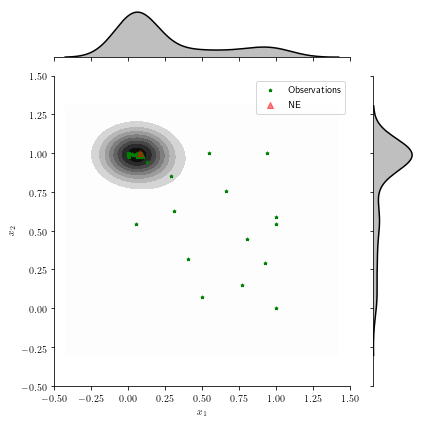

In [20]:
# Search
bn_approx.run()
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

{'dim': 2, 'actual_fevals': 40, 'run': 1, 'alg': 'BN-approx', 'regret_trace': [49.88076611660316, 22.582389450853224, 3.7162355538717584, 3.7162355538717584, 3.7162355538717584, 2.638754629663138, 2.638754629663138, 2.638754629663138, 2.638754629663138, 2.638754629663138, 2.638754629663138, 2.638754629663138, 1.9471779122608375, 1.9471779122608375, 1.9471779122608375, 1.9471779122608375, 1.9471779122608375, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428, 0.00497927046328428], 'fevals': 40}


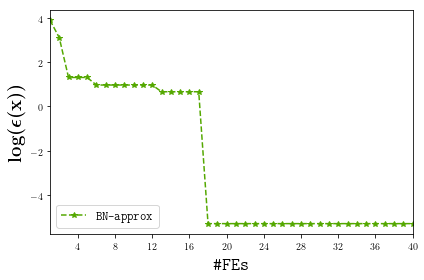

In [25]:
# compute regret trace
run = 1
dim = 2
alg_variant = 'BN-approx'
actual_fevals = len(bn_approx.pts)
fevals = actual_fevals
best_regret = np.inf
regret_trace = []
for xs in bn_approx.pts[:fevals]:
    best_regret = min(best_regret, problem.ne_regret(xs, is_unit=True)) # is_unit denote that xs is in the space[0,1]
    regret_trace.append(best_regret)


stats = {
    'fevals': fevals,
    'run': run,
    'alg': alg_variant,
    'dim': dim,
    'actual_fevals': actual_fevals,
    'regret_trace': regret_trace
}
print(stats)
plot_regret_trace([stats], is_file=False)

In [26]:
# get a suggested NE (experimental):
best_ne_br = bn_approx.suggest_approx_ne(best_crit='br')
best_ne_abr =  bn_approx.suggest_approx_ne(best_crit='abr')
best_ne_std = bn_approx.suggest_approx_ne(best_crit='std')

In [27]:
pts = [best_ne_br, best_ne_abr, best_ne_std]
names = ['br', 'abr', 'std']
print("NE: {}, Approx Regret: {}".format(
    problem.get_x_ne(), 
    bn_approx.approx_max_regret(problem.get_x_ne())
    ))
print("After {} function evaluations".format(len(bn_approx.pts)))

for pt, name in zip(pts, names):
    print("=" * 20)
    print("{}-best pt: {}, Actual regret: {}".format(name, pt, problem.ne_regret(pt, is_unit=True)))
    print("{}-best pt: {}, Approx regret: {}".format(name, pt, bn_approx.approx_max_regret(pt)))
    print("player 1 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_approx.approx_regret(pt, 0),
        bn_approx.approx_regret(problem.get_x_ne(), 0)
    ))
    print("player 2 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_approx.approx_regret(pt, 1),
        bn_approx.approx_regret(problem.get_x_ne(), 1)
    ))

NE: [0.08093333 1.        ], Approx Regret: 0.506430116863
After 40 function evaluations
br-best pt: [4.35836379e-04 9.99548196e-01], Actual regret: 13.7989584487
br-best pt: [4.35836379e-04 9.99548196e-01], Approx regret: 0.523716793319
player 1 - br-best pt regret: 0.804161188214, NE regret : 0.623227781966
player 2 - br-best pt regret: 0.225703719899, NE regret : 0.221041886087
abr-best pt: [0.09015987 0.99472343], Actual regret: 0.142773409624
abr-best pt: [0.09015987 0.99472343], Approx regret: 0.506723103604
player 1 - abr-best pt regret: 0.597704752056, NE regret : 0.454195000647
player 2 - abr-best pt regret: 0.453836693168, NE regret : 0.326077975782
std-best pt: [5.64742139e-04 9.97405951e-01], Actual regret: 13.996667225
std-best pt: [5.64742139e-04 9.97405951e-01], Approx regret: 0.850598746055
player 1 - std-best pt regret: 0.76982579659, NE regret : 0.644180446039
player 2 - std-best pt regret: 0.307806343218, NE regret : 0.37725965626


In [28]:
closest_sampled_pt = bn_approx.pts[np.argmin(np.sum((bn_approx.pts - problem.get_x_ne())**2, axis=1)),:]
print("BN-closest (to actual NE) sampled pt: {}, Actual regret: {}".format(closest_sampled_pt, problem.ne_regret(closest_sampled_pt, is_unit=True)))

BN-closest (to actual NE) sampled pt: [0.08432135 0.99667634], Actual regret: 0.0555771710707
